In [1]:
from InternallyRecurrentDriverMOandIOnCaller import Driver
from pfc import *
import numpy as np
import math
import time
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
%matplotlib inline

############################       Network       ############################

agg = np.load('loaded_data0.npy')
num_neurons = len(agg) + 1 # target "neuron"

period = 230.0 # 1840.0 (need to take this out)
time_constant = 0.1
chaotic_constant = 1.3
input_num = 5
output_num = num_neurons
gg_sparseness = 0.9
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
sigma = 0.0 # noise scale
epochs = 6

# In[3]
targ = [ 0 for i in range(3000) ]
tests = [ targ for i in range(num_neurons) ]
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant,
             input_num, output_num, gg_sparseness, gz_sparseness,
             fg_sparseness, readout_sparseness, g_gz, alpha, dt,
             tests, sigma, target_in_network=True)

############################ Organize targets  ############################

def sigmoid(x):
    return x / math.sqrt(100 + x * x)

poss_maps = {
    'baseline': [[ 0 for i in range(len(agg[0][0]))                     ] for k in range(num_neurons)],
    'pos'     : [[ sigmoid(i) for i in range(len(agg[0][0]))            ] for k in range(num_neurons)],
    'neg'     : [[ -1 * sigmoid(i) for i in range(len(agg[0][0]))       ] for k in range(num_neurons)],
    'r_pos'   : [[ 1 - sigmoid(i) for i in range(100)                   ] for k in range(num_neurons)],
    'r_neg'   : [[ -1 * (1 - sigmoid(i)) for i in range(100)            ] for k in range(num_neurons)],
    'base'    : [[ 0 for i in range(100)                                ] for k in range(num_neurons)]
}

done = [[ 0 for i in range(300) ] for k in range(input_num)]
done_ = [[ 0.2 for i in range(300) ] for k in range(input_num)]

Initializing network...
('Time ellapsed in network instantiation: ', 0.18802785873413086)


In [2]:
cc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # color coherence values
mc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # motion coherence values
vecs = []  # context / coherence vecs
ret = [0, 0, 0, 0, 1]

for i in range(2):
    for j in range(len(cc)):
        for k in range(len(mc)):
            if i == 0: vecs.append((np.array([ cc[j], mc[k], 1, 0, 0 ]), True if cc[j] > 0 else False))
            else: vecs.append((np.array([ cc[j], mc[k], 0, 1, 0 ]), True if mc[k] > 0 else False))

vecs_test = np.copy(vecs)
appendpos = np.append(poss_maps['pos'][0], poss_maps['r_pos'][0])
appendneg = np.append(poss_maps['neg'][0], poss_maps['r_neg'][0])

In [9]:
############################ Train the network ############################

base = np.zeros(80) # wait 200 ms
basenet = [ base for i in range(num_neurons-1) ]
def train(batch, vec):
    print('.')
    gain = [ np.linspace(0, batch[p][0], 20) for p in range(len(batch)) ]
    gain.append(np.zeros(20)) 
    driv.train(gain, vec) # smooth gain
    driv.train(batch, vec) # correspondence between data and context    
    decline = [ np.linspace(batch[p][-1], 0, 20) for p in range(len(batch)) ]
    decline.append(batch[-1][len(batch[0]):len(batch[0])+20])
    driv.train(decline, ret) # smooth decline   
    basenet.append(batch[-1][len(agg[0][0])+20:])
    driv.train(basenet, ret)
    del basenet[-1]

# In[6]
"""

    TRAIN THE NETWORK
    -----------------

    Train the network for range(ephocs), rearranging
    the order of input stimulus presentation.

"""
start = time.time()
for epoch in range(epochs):
    if epoch == epochs / 4:
        end = time.time()
        print("[ 25%] training complete.", end - start, "seconds ellapsed.")
    if epoch == epochs / 2:
        end = time.time()
        print("[ 50%] training complete.", end - start, "seconds ellapsed.")
    if epoch == 3 * (epochs / 4):
        end = time.time()
        print("[ 75%] training complete.", end - start, "seconds ellapsed.")
    np.random.shuffle(vecs)
    for i in range(len(vecs)):
        if i == len(vecs) / 2: print("Processed 50% of contexts")
        targ = [ agg[k][i] for k in range(len(agg)) ]
        if vecs[i][1]: targ.append(appendpos)
        else: targ.append(appendneg)
        train(targ, vecs[i][0])

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 25%] training complete.', 1272.753867149353, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 50%] training complete.', 3821.756082057953, 'seconds ellapsed.')
('[ 75%] training complete.', 3821.7564709186554, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.

In [ ]:
sig = [ [] for i in range(72) ]
targ = [ [] for i in range(72) ]

ICs = []
ress = [ [ [ [] for i in range(72) ] for k in range(10) ] for b in range(5) ]
print(np.shape(ress))

start_x = driv.network.membrane_potential

allICs = []

toshow1 = [ agg[i][0] for i in range(len(agg)) ]
toshow = [driv.neuron[i][20:(len(toshow1[0])+20)] for i in range(num_neurons)]
basenet.append(appendpos)
vecs_b = np.copy(vecs)
vecs = vecs_test
for q, scale in enumerate([0, 0.01, 0.5, 0.1, 0.25]):
    for z in range(10):
        driv.network.membrane_potential = start_x
        if z == 0 and q == 0:
            driv.track_ics = True
            driv.ICs = []
        elif z > 1:
            driv.track_ics = False
            driv.ICs = []
            allICs = ICs + driv.ICs
        for t in range(len(vecs)):
            driv.targets = [ [] for i in range(num_neurons) ]
            driv.errors = [ [] for i in range(num_neurons) ]
            driv.neuron = [ [] for i in range(num_neurons) ]
            driv.signal = []

            ICs.append((driv.network.membrane_potential, vecs[t][0]))
            test = [ agg[k][t] for k in range(len(agg)) ]
            if vecs[t][1]: test.append(appendpos)
            else: test.append(appendneg)

            gain = [ np.linspace(0, test[p][0], 20) for p in range(len(test)) ]
            gain.append(test[-1][0:20])
            driv.test(gain, vecs[t][0])
            ICs.append((driv.network.membrane_potential, vecs[t][0]))

            driv.test(test, vecs[t][0], off=100, twn=True, scale=scale)
            ICs.append((driv.network.membrane_potential, vecs[t][0]))

            drop = [ np.linspace(0, test[t][-1], 20) for p in range(len(test)) ]
            drop.append(test[-1][0:20])
            driv.test(drop, ret, off=len(test[t])+100)
            ICs.append((driv.network.membrane_potential, vecs[t][0]))


            driv.test(basenet, ret, off=len(test[t])+200)
            ICs.append((driv.network.membrane_potential, vecs[t][0]))

            ress[q][z][t] = [ driv.neuron[i] for i in range(num_neurons) ]

(5, 10, 72, 0)


8


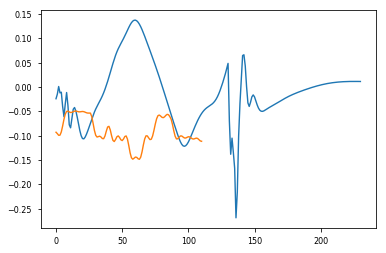

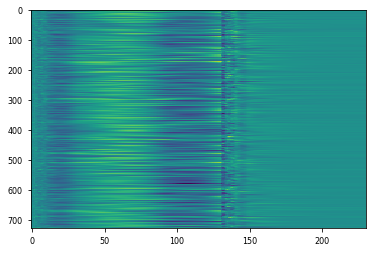

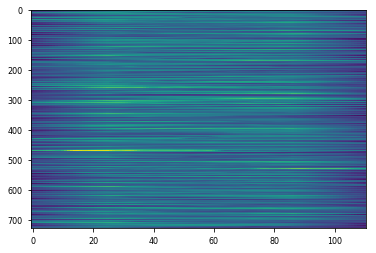

In [8]:
plt.figure()
plt.plot(ress[0][0][1][0] / np.linalg.norm(ress[0][0][1][0]))
plt.plot([ agg[k][1] for k in range(len(agg)) ][1] / np.linalg.norm([ agg[k][1] for k in range(len(agg)) ][1]))

plt.figure()
plt.imshow(ress[0][0][1], aspect='auto')

plt.figure()
plt.imshow([ agg[k][0] for k in range(len(agg)) ], aspect='auto')

In [ ]:
import dynamicalAnalysis
X = np.array([ driv.ICs[i][0] for i in range(len(driv.ICs)) ])
pcMat = np.dot(X.T, X)
U, S, Ut = np.linalg.svd(pcMat)
points = np.load('april_13_2018_fixedpoints.npy')
da = dynamicalAnalysis.dynamicAnalysis(driv.network)

plt.figure()
plt.scatter(np.arange(len(S)), S)

In [ ]:
### Project down to the top 6 PCS

def proj(u):
    proj = np.zeros(len(u))
    for i in range(6):
        proj += (np.dot(u, Ut[i]) / (np.linalg.norm(Ut[i]) ** 2)) * Ut[i]
    return proj

projected_fixed = np.array([ proj(points[i][2]['x']) for i in range(0, 5) ])
projected_paths = np.array([ np.array([proj(points[i][3][j]) for j in range(len(points[i][3]))]) for i in range(0,5)])

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=31, azim=-27)
ax.scatter3D(projected_fixed[:,0], projected_fixed[:,1], projected_fixed[:,2], c='r', s=170)
for i in range(len(projected_paths)):
    ax.scatter3D(projected_paths[i][:,0], projected_paths[i][:,1], projected_paths[i][:,2], s=4)
# plt.savefig('-27_deg_fixed_paths', dpi=300)

## Transient pulse test

Everything underneath testing how the transient pulse from the paper works

In [ ]:
trans_inps = np.array([0, 2, 1, 0, 0])
trans_inps2 = np.array([0, 0, 1, 0, 0])
driv.network.membrane_potential = points[0][2]['x']
x_test = points[0][2]['x']
target = np.zeros((num_neurons,50))
driv.test(target, trans_inps)
target = np.zeros(150)
driv.test([target for i in range(num_neurons)], trans_inps2)

In [ ]:
projd = proj(x_test)
def process_pulse(path):
    xs, ys, zs = [], [], []
    for tr in path:
        projdi = proj(tr)
        xs.append(projdi[0])
        ys.append(projdi[1])
        zs.append(projdi[2])
    return xs, ys, zs

path1 = [driv.ICs[i][0] for i in range(len(driv.ICs)-800,len(driv.ICs)-600)]
path2 = [driv.ICs[i][0] for i in range(len(driv.ICs)-600,len(driv.ICs)-400)]
path3 = [driv.ICs[i][0] for i in range(len(driv.ICs)-400,len(driv.ICs)-200)]
path4 = [driv.ICs[i][0] for i in range(len(driv.ICs)-200,len(driv.ICs))]

x1, y1, z1 = process_pulse(path1)
x2, y2, z2 = process_pulse(path2)
x3, y3, z3 = process_pulse(path3)
x4, y4, z4 = process_pulse(path4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=142)
ax.scatter3D(projd[0], projd[1], projd[2], c='r', s=170)
ax.scatter3D(x1, y1, z1, s=4)
ax.scatter3D(x2, y2, z2, s=4)
ax.scatter3D(x3, y3, z3, s=4)
ax.scatter3D(x4, y4, z4, s=4)
ax.scatter3D(x1[-1], y1[-1], z1[-1], c='r', s=170)
ax.scatter3D(x3[-1], y3[-1], z3[-1], c='r', s=170)
# plt.savefig('142_deg_fixed_paths_transient_pulse_all4', dpi=300)